# Project - Fundamentals of Data Analysis
***


### References
***
**Box Plot - Subject References**       
    - http://www.physics.csbsju.edu/stats/box2.html
    - https://www.khanacademy.org
    - http://vita.had.co.nz/papers/boxplots.pdf
    - asq.org/learn-about-quality/data-collection-analysis-tools/overview/box-whisker-plot.html
    
**Technical References**       
    - http://pandas.pydata.org/pandas-docs/stable/
    - https://docs.scipy.org/doc/numpy/reference/routines.random.html
    - https://www.bogotobogo.com/python/python_fncs_map_filter_reduce.php
    - https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/
    - http://effbot.org/zone/python-list.htm
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html
    - https://pypi.org/project/pandasql/
***

**Box Plot** <br>
The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. 

***
**1(a):History**<br>

- Early   1950: The basic graphic form of the boxplot called the range-bar, was established.
- Year    1969: John Tukey introduced the box plot as part of his toolkit for exploratory data analysis.
- Year    1996: Few boxplots replaced the extremes with fixed quartiles [2% min and 98% max]
- Year    1988: Vase plot, a variation of box plot, in this box is replaced with a symmetrical display of estimated density.
- Year    1996: High density region box plots were introduced
- Year    1998: Violin plots  a variation of box plot, this display the density for all data points, not just the middle half.
- Year    1998: Bivariate boxplots were introduced
- Year    1999: Few boxplots used semi-interquartile for skewness
- Year    2000: Rotational box plots were introduced
- Year    2001: Midgap plot was proposed to improve the data-ink ratio
- Year    2003: The box-percentile plot displays a modiﬁed empirical cumulative density function (ECDF).
- Year    2006: The letter-value boxplot was designed to overcome the shortcomings of the boxplot for large data.
- 2009 to 2010: Used to display distributional features like kurtosis, skewness,mean, standard error and multimodality 
<br>
***
**1(b):Situations where it is used**<br>


- **Situations** 
        - Where multiple data sets from independent sources that are related to each other in some way. 
        - For identifying outliers and for comparing distributions.
- **Examples** 
        - Test scores between schools or classrooms
        - Data from before and after a process change
        - Data from duplicate machines manufacturing the same products.
        
***

array([32.95589167,  3.37366715, 72.94763176, 26.65160669, 30.51195412,
       55.7656482 , 67.24018715, 71.87823695, 70.75515658, 37.74624171,
        1.54151592, 33.63468613, 90.78451575, 43.80963965, 61.46571998,
       35.67602576, 70.98178852, 70.37193158,  1.7677819 , 48.72657089,
       54.96847428, 20.07480701, 83.55620839, 45.21515461, 25.78940185,
       59.58381496,  5.18125102, 76.26424226,  6.43951252, 67.53792278,
       31.55913297, 36.6405862 , 51.91929394, 83.78805238, 10.82519961,
       99.84200037, 97.22327336, 63.51806885, 35.44733659, 50.41891928,
        7.18899174, 90.08448995, 76.5140867 , 36.46221474, 75.58839456,
       67.4528403 , 23.09059789, 44.06336354, 86.77693634, 96.01976079])

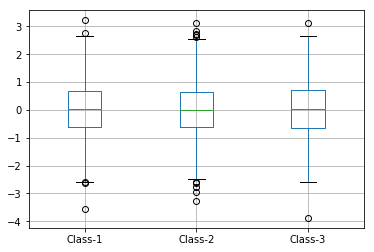

In [20]:
# Import the wine data set from the sklearn
# Load the wine data set into data frame
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np



Class0,Class1,Class2 =[],[],[]
df_alcohol = pd.DataFrame(columns=['Class-1','Class-2','Class-3'])
                        

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data['target']
i,y=0,0
                          
for index, row in df.iterrows():
    if (row['target'] == 0): df_alcohol.at[index,'Class-1'] = (row['alcohol'])
for index, row in df.iterrows():
    if (row['target'] == 1): 
        df_alcohol.at[i,'Class-2'] = (row['alcohol'])
        i = i+1
for index, row in df.iterrows():
    if (row['target'] == 2): 
        df_alcohol.at[y,'Class-3'] = (row['alcohol'])
        y=y+1

np.random.seed(1234)
df = pd.DataFrame(np.random.randn(1000,3),  columns=['Class-1', 'Class-2', 'Class-3'])
boxplot = df.boxplot(column=['Class-1', 'Class-2', 'Class-3'])
boxplot


spread = np.random.rand(50) * 100

center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
spread